<a href="https://colab.research.google.com/github/turjo997/Pattern-Recognition/blob/main/Assignment_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.spatial
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir1 = "/content/drive/MyDrive/Random Files/train_knn.txt"
dir2 = "/content/drive/MyDrive/Random Files/test_knn.txt"

In [ ]:
df = pd.read_csv(dir1 , sep="," ,  header = None, dtype = 'Float64')
df.columns = ['X1','X2' , 'label']
print(df)

     X1   X2  label
0   7.0  7.0    1.0
1   7.0  4.0    1.0
2   6.0  4.0    1.0
3   7.0  5.0    1.0
4   7.0  6.0    1.0
5   6.0  7.0    1.0
6   6.0  6.0    1.0
7   3.0  4.0    2.0
8   2.0  3.0    2.0
9   3.0  2.0    2.0
10  4.0  3.0    2.0
11  3.0  3.0    2.0
12  4.0  4.0    2.0
13  1.0  4.0    2.0


In [ ]:
df1 = pd.read_csv(dir2 , sep="," ,  header = None, dtype = 'Float64')
df1.columns = ['X1','X2']
print(df1)

    X1   X2
0  3.0  7.0
1  7.0  7.0
2  4.0  3.0
3  2.0  8.0
4  3.0  5.0
5  1.0  2.0
6  4.0  8.0
7  8.0  3.0
8  8.0  4.0


In [ ]:
trainval = df.values
testval = df1.values

In [ ]:
trainval.ndim

2

In [ ]:
class1X1 = []
class1X2 = []

class2X1 = []
class2X2 = []

for i , j , k in trainval:
  if k == 1.0:
    class1X1.append(i)
    class1X2.append(j)
  else:
    class2X1.append(i)
    class2X2.append(j)

In [ ]:
class1X1 = np.array(class1X1)
class1X2 = np.array(class1X2)
class2X1 = np.array(class2X1)
class2X2 = np.array(class2X2)

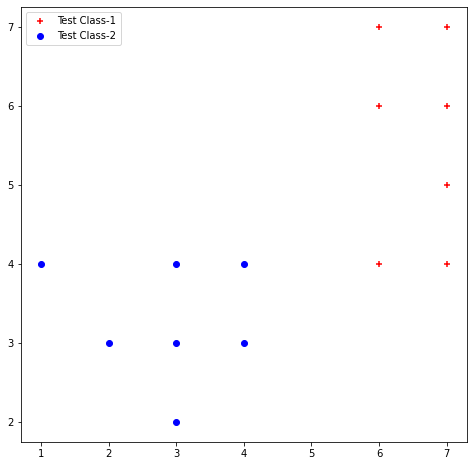

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(class1X1, class1X2, c='red', label = 'Test Class-1', marker = '+')
plt.scatter(class2X1, class2X2, c='blue', label = 'Test Class-2', marker = 'o')
plt.legend()
plt.show()

In [ ]:
X_train  = [] 
for i , j , k in trainval:
  ar = np.array([i , j])
  X_train.append(np.hstack(ar))

X_train = np.array(X_train)
X_train.ndim  

2

In [ ]:
X_test  = [] 
for i , j  in testval:
  ar = np.array([i , j])
  X_test.append(np.hstack(ar))

X_test = np.array(X_test)
X_test.ndim  

2

In [ ]:
Y_train  = [] 
for i , j , k  in trainval:
  Y_train.append(k)

Y_train = np.array(Y_train)
Y_train  

array([1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
def euclidean_distance(pt1 , pt2):
    distance = np.linalg.norm(pt2-pt1)
    return distance

In [ ]:
distance = []
def KNN(X_train , X_test , Y_train , k):
    final_output = []
    for i in range(len(X_test)):
        dis = []
        for j in range(len(X_train)):
            dist = (euclidean_distance(X_test[i] , X_train[j]))
            dis.append([dist , j])
       
        dis.sort()
       
        votes = []
        dis = dis[0:k]
       # print(dis[0])
        
        distance.append(dis)
        
        votes = []
        for p , j in dis:
          #print(p , j , Y_train[j])
          votes.append(Y_train[j])
        ans = Counter(votes).most_common(1)[0][0]
        final_output.append(ans)
           
        
    return final_output  

In [ ]:
k = input('Choose the k value')
print(k)

Choose the k value5
5


In [ ]:
k = int(k)
res  = KNN(X_train , X_test , Y_train  , k)

test1X1 = []
test1X2 = []

test2X1 = []
test2X2 = []
print("The test data set result is : " , end= ' ')
for i in range(len(res)):
  if res[i] == 1.0:
    test1X1.append(testval[i][0])
    test1X2.append(testval[i][1])
  else:
    test2X1.append(testval[i][0])
    test2X2.append(testval[i][1])

  print(res[i] , end= ' ')

The test data set result is :  2.0 1.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 

In [ ]:
test1X1 = np.array(test1X1)
test1X2 = np.array(test1X2)
test2X1 = np.array(test2X1)
test2X2 = np.array(test2X2)

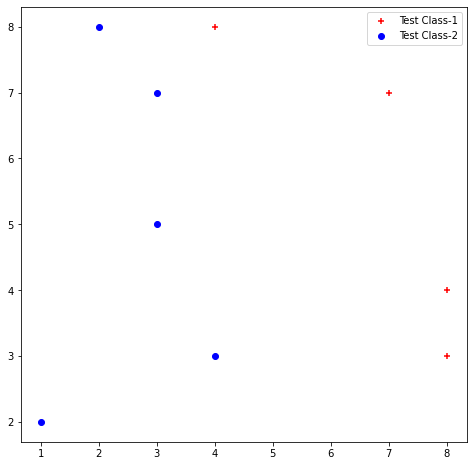

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(test1X1, test1X2, c='red', label = 'Test Class-1', marker = '+')
plt.scatter(test2X1, test2X2, c='blue', label = 'Test Class-2', marker = 'o')
plt.legend()
plt.show()

In [ ]:
distance1 = np.array(distance)

for j in range(len(distance)):
  for i  in range(k):
    d = distance1[j,i,0]
    ind = int(distance1[j,i,1])
    print('Distance-' , i + 1 , 'is ' , d, '  class: ' , Y_train[ind])

  print('predicted class: ' , res[j])
  print('\n')
  

Distance- 1 is  3.0   class:  1.0
Distance- 2 is  3.0   class:  2.0
Distance- 3 is  3.1622776601683795   class:  1.0
Distance- 4 is  3.1622776601683795   class:  2.0
Distance- 5 is  3.605551275463989   class:  2.0
predicted class:  2.0


Distance- 1 is  0.0   class:  1.0
Distance- 2 is  1.0   class:  1.0
Distance- 3 is  1.0   class:  1.0
Distance- 4 is  1.4142135623730951   class:  1.0
Distance- 5 is  2.0   class:  1.0
predicted class:  1.0


Distance- 1 is  0.0   class:  2.0
Distance- 2 is  1.0   class:  2.0
Distance- 3 is  1.0   class:  2.0
Distance- 4 is  1.4142135623730951   class:  2.0
Distance- 5 is  1.4142135623730951   class:  2.0
predicted class:  2.0


Distance- 1 is  4.123105625617661   class:  1.0
Distance- 2 is  4.123105625617661   class:  2.0
Distance- 3 is  4.123105625617661   class:  2.0
Distance- 4 is  4.47213595499958   class:  1.0
Distance- 5 is  4.47213595499958   class:  2.0
predicted class:  2.0


Distance- 1 is  1.0   class:  2.0
Distance- 2 is  1.414213562373095